# Proyecto de Predicción de Series Temporales

## Estudiante: Miguel Rodríguez Delgado
- **Programa Académico:** Master in Data Science & Analytics
- **Institución:** MIOTI

## Descripción del Proyecto
El objetivo de este proyecto es desarrollar un modelo de predicción de series temporales utilizando técnicas de análisis de datos. Se trabajará con datos históricos de una serie temporal específica y se buscará generar predicciones para los valores futuros.

## Metodología

1. **Preparar el Contexto:** Se realizará una revisión exhaustiva de la literatura y una investigación preliminar sobre el dominio específico de la serie temporal. 

2. **Carga y Preparación de los Datos:** Se procederá a la carga de los datos históricos y se realizará su preparación para el análisis. Esto incluirá la limpieza de datos, el manejo de valores faltantes y la transformación de la serie temporal en un formato adecuado para el análisis y modelado.

3. **Componentes de la Serie Temporal:** Se identificarán y analizarán los componentes clave de la serie temporal, como la tendencia, la estacionalidad y la variabilidad residual. Se utilizarán técnicas como descomposición de series temporales para separar estos componentes y comprender su contribución a la serie temporal en su conjunto.

4. **¿Cómo Podemos Mejorar las Predicciones de Nuestra Serie Temporal?:** Se explorarán diversas estrategias y técnicas para mejorar la precisión de las predicciones de la serie temporal. 

5. **Evaluación del Método de Cálculo del Coeficiente de Estacionalidad:** Se evaluará el método utilizado para calcular el coeficiente de estacionalidad y se comparará con los valores reales de la serie. Se utilizarán métricas de evaluación apropiadas para determinar la eficacia del método y su impacto en la precisión de las predicciones de la serie temporal.


## Tecnologías Utilizadas
- Python
- Bibliotecas empleadas: Pandas, NumPy
- Herramientas de visualización: Matplotlib, Seaborn



# 0. Objetivo

En este notebook se explicarán las componentes de una serie temporal y como calcularlas, así como la realización de previsiones de series temporales, a partir de sencillos modelos.

## 1. Preparar el contexto

El primer paso es importar las librerías necesarias para el tratamiento de los datos.

In [443]:
import numpy as np  # Importamos numpy para cálculos numéricos eficientes
import pandas as pd  # Importamos pandas para manipulación y análisis de datos
import matplotlib.pyplot as plt  # Importamos matplotlib para trazar gráficos
import seaborn as sns  # Importamos seaborn para visualización de datos

## 2. Carga y preparación de los datos

Para este ejemplo, los datos provienen de un archivo CSV, por lo que utilizaremos el método read_csv de Pandas para convertirlos en un DataFrame.

In [444]:
## Carga de los datos
data_path = 'retail_sales.csv'
df_sales = pd.read_csv(data_path)

Es buena práctica utilizar métodos como .info() o .describe() para tener una primera impresión del DataFrame y los datos incluídos en el mismo.

In [445]:
# Info nos proporciona un resumen del DataFrame.
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    72 non-null     object
 1   sales   72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [446]:
# Describe genera estadísticas descriptivas de los datos del DataFrame.
df_sales.describe()

,sales
count,72.000000
mean,401710.138889
std,39999.439045
min,311022.000000
25%,374655.750000
50%,398296.500000
75%,432892.500000
max,501232.000000


Cuando trabajamos con datos de series temporales, es fundamental que la columna que contiene las fechas esté en un formato adecuado para que podamos realizar operaciones de tiempo y visualización de manera efectiva. Por lo tanto, vamos a convertir la columna 'date' de nuestro DataFrame al formato de fecha y hora utilizando el método pd.to_datetime(). Esto nos permitirá manipular las fechas de manera más eficiente y facilitará su futura visualización y análisis.

In [447]:
# Creamos un campo fecha y lo convertimos en el índice de nuestro DataFrame.
df_sales['date'] = pd.to_datetime(df_sales['date'], format='%Y-%m-%d') 
# La columna en formato datetime pasará a ser el índice del DataFrame.
df_sales.index = df_sales.date

El parámetro **format**  es importante cuando las fechas tienen un formato específico que no es reconocido automáticamente por pandas.

Nuestra serie temporal abarca un período significativo, desde octubre de 2009 hasta septiembre de 2015, lo que nos proporciona una amplia ventana para analizar patrones estacionales y tendencias a lo largo de varios años. Este rango de datos nos permite identificar ciclos estacionales, como picos de ventas en ciertos meses del año, así como tendencias a largo plazo que podrían influir en nuestras previsiones futuras. En este caso la previsión será para un año.

In [448]:
# Creamos un nuevo DataFrame que incluye las fechas a predecir y valores nulos en la columna sales.
df_fechas_prevision = pd.DataFrame({'sales':12*[np.nan]},
                             index = pd.date_range('2015-10-01', periods=12, freq='MS'))
df_fechas_prevision

,sales
2015-10-01,NaN
2015-11-01,NaN
2015-12-01,NaN
2016-01-01,NaN
2016-02-01,NaN
2016-03-01,NaN
2016-04-01,NaN
2016-05-01,NaN
2016-06-01,NaN
2016-07-01,NaN


El código **pd.date_range**('2015-10-01', periods=12, freq='MS') genera un rango de fechas a partir del 1 de octubre de 2015, con una longitud de 12 meses y con una frecuencia de inicio de mes (MS, por sus siglas en inglés, "Month Start").

Esto significa que las fechas generadas serán el primer día de cada mes, comenzando desde octubre de 2015 y avanzando hasta septiembre de 2016. Cada fecha representará el inicio de un nuevo mes en el rango especificado.

In [449]:
# Unimos ambos DataFrames utilizando el método concat, que añadirá al DataFrame de ventas existente las fechas de predicción. 
# Esto nos permite integrar las fechas de predicción con los datos existentes de ventas para realizar análisis y visualizaciones completas.

df_sales = pd.concat([df_sales, df_fechas_prevision])

In [450]:
# Nos quedamos únicamente con la columna sales y las fechas en el índice, eliminando la columna date del DataFrame.
df_sales.drop(columns=(["date"]), inplace=True)

## 3. Componentes de la serie temporal

A continuación, vamos a representar la serie y sus componentes.

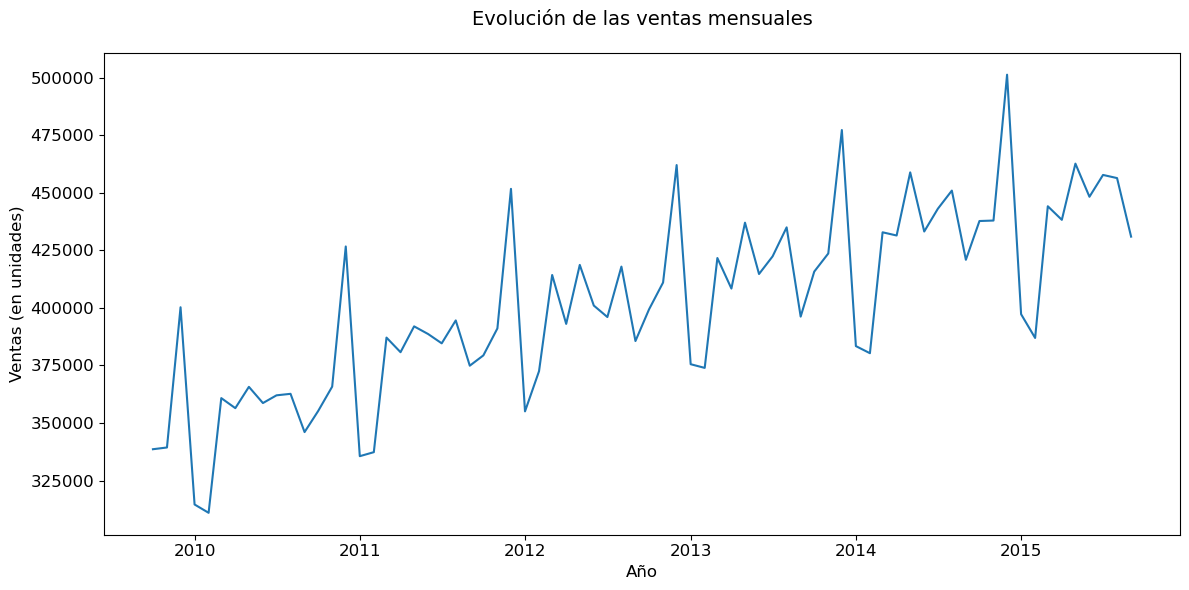

In [451]:
# Creamos la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Trasamos la serie temporal
sns.lineplot(data=df_sales, x=df_sales.index, y='sales', ax=ax)

# Personalizamos el gráfico
ax.set_title('Evolución de las ventas mensuales', pad=20, fontsize=14)  # Añadimos un título descriptivo y ajustamos el espacio entre el título y el gráfico
ax.set_ylabel('Ventas (en unidades)', fontsize=12)  # Añadimos una etiqueta más informativa al eje y
ax.set_xlabel('Año', fontsize=12)  # Añadimos una etiqueta más descriptiva al eje x
ax.tick_params(axis='both', labelsize=12)  # Ajustamos el tamaño de las etiquetas de los ejes

# Mostramos el gráfico
plt.tight_layout()  # Ajustamos automáticamente el diseño del gráfico para que quepa todo el contenido


#### ¿Qué componentes tiene una serie temporal?

#### Tendencia

En el contexto de series temporales, la tendencia se refiere a la dirección general y persistente en la que los datos cambian o se desarrollan con el tiempo. Es una característica importante que describe el comportamiento a largo plazo de la serie.

La tendencia puede manifestarse de varias formas:

1. **Tendencia ascendente (creciente)**: Los valores de la serie aumentan constantemente con el tiempo.
2. **Tendencia descendente (decreciente)**: Los valores de la serie disminuyen constantemente con el tiempo.
3. **Tendencia estacionaria**: La serie no muestra un cambio sistemático en una dirección particular, sino que oscila alrededor de un valor medio constante.

La identificación y comprensión de la tendencia en una serie temporal es fundamental para el análisis y la predicción. Puede proporcionar información valiosa sobre el comportamiento general de los datos y ayudar a discernir patrones a largo plazo que pueden influir en las decisiones comerciales o en la construcción de modelos predictivos. Además, la eliminación de la tendencia de una serie temporal puede ser un paso importante en la descomposición de la serie en sus componentes estacionales, cíclicos y residuales para un análisis más detallado.

#### Estacionalidad

En el contexto de las series temporales, la estacionalidad se refiere a patrones recurrentes y predecibles que se observan a intervalos regulares dentro de un período de tiempo. Estos patrones pueden repetirse diaria, semanal, mensual, trimestral o anualmente, dependiendo de la naturaleza de los datos y el período de observación.

La estacionalidad puede manifestarse de varias maneras:

1. **Estacionalidad aditiva**: Se refiere a fluctuaciones que tienen aproximadamente la misma amplitud en toda la serie temporal. En otras palabras, la magnitud de la variación estacional es constante a lo largo del tiempo.

2. **Estacionalidad multiplicativa**: Se refiere a fluctuaciones que varían en magnitud a lo largo del tiempo. Por ejemplo, si la amplitud de la variación estacional aumenta o disminuye con el tiempo, se considera una estacionalidad multiplicativa.

La identificación y modelado de la estacionalidad en una serie temporal es crucial para comprender su comportamiento y hacer predicciones precisas. La presencia de estacionalidad puede afectar significativamente el rendimiento de los modelos de predicción y debe ser tenida en cuenta durante el análisis y la modelización de datos de series temporales. Las técnicas comunes para tratar la estacionalidad incluyen la descomposición de series temporales, el ajuste de modelos estacionales y el suavizado de datos.

<div style="text-align:center">
    <img src="efectos.png" alt="Gráfico">
</div>

#### Componentes aleatorios de la serie

Cuando eliminamos la tendencia y la estacionalidad de una serie temporal, lo que queda se conoce como los componentes residuales o de irregularidad. Estos componentes representan la variación aleatoria o no sistemática en los datos que no puede ser explicada por la tendencia ni por la estacionalidad.

Los componentes residuales son importantes porque contienen información sobre la variabilidad no explicada en los datos y pueden contener señales importantes, como eventos aleatorios, ruido o comportamiento impredecible.

Una vez que se ha eliminado la tendencia y la estacionalidad de una serie temporal, los componentes residuales pueden ser utilizados para modelar y hacer predicciones sobre el comportamiento futuro de los datos. Los modelos de series temporales a menudo se ajustan a los componentes residuales para capturar cualquier patrón o comportamiento no sistemático en los datos que no haya sido explicado por la tendencia y la estacionalidad.

En resumen, los componentes residuales de una serie temporal representan la variabilidad no sistemática y pueden ser útiles para comprender mejor la naturaleza de los datos y hacer predicciones más precisas sobre su comportamiento futuro.

#### Representación de la serie temporal

En nuestra serie temporal, las componentes tienen el siguiente aspecto:

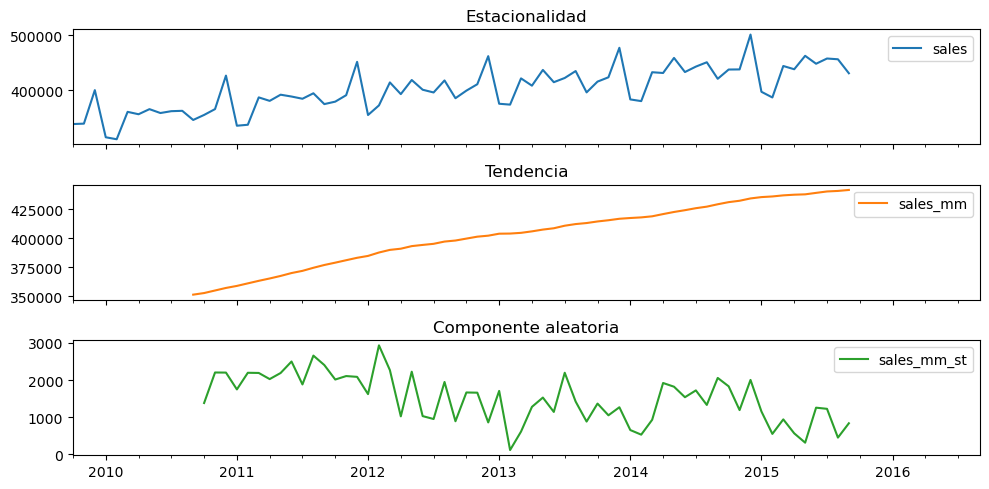

A continuación, vamos a entender como podemos extraer las diferentes componentes de la serie.

No debemos olvidar el objetivo principal de este notebook que no es otro que realizar previsiones sobre una serie temporal. Existen opciones muy sencillas como asignar a las previsiones el último valor o la media de la serie, pero en este caso el resultado no es bueno.

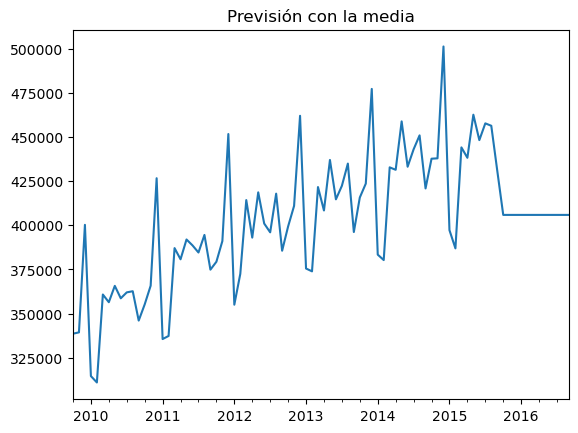, 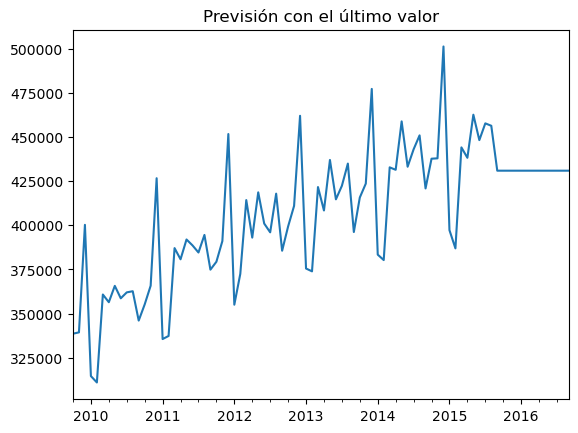


## 4. ¿Cómo podemos mejorar las predicciones de nuestra serie temporal?

Para realizar las predicciones, primero eliminaremos las componentes de la serie temporal, de modo que calculemos nuestra previsión sobre el residuo. Esto implica descomponer la serie en sus componentes de tendencia, estacionalidad y residuo, y luego pronosticar solo el residuo. Esta estrategia nos permite capturar mejor las fluctuaciones y patrones no sistemáticos en los datos, lo que puede conducir a previsiones más precisas y útiles.

### 4.1.-  Eliminamos las componentes de la serie: estacionalidad y tendencia

#### a) Eliminamos la estacionalidad utilizando la ventana móvil.

La técnica de ventana móvil, también conocida como promedio móvil, es una herramienta comúnmente utilizada en el análisis de series temporales para eliminar la estacionalidad y suavizar los datos. Consiste en calcular el promedio de un conjunto de observaciones adyacentes en una serie temporal, desplazando gradualmente la ventana a lo largo del tiempo.

La razón principal para utilizar una ventana móvil para eliminar la estacionalidad de una serie temporal es su capacidad para resumir y suavizar las fluctuaciones de corto plazo, lo que permite identificar mejor las tendencias subyacentes y los patrones estacionales en los datos. Al calcular el promedio de un conjunto de observaciones adyacentes, la ventana móvil elimina el ruido y las variaciones aleatorias en los datos, centrándose en las tendencias de largo plazo y los patrones estacionales.

Además, la ventana móvil es una técnica simple y fácil de implementar, lo que la hace especialmente útil en situaciones donde se requiere una solución rápida y eficiente para suavizar los datos y realizar análisis exploratorio de series temporales. Sin embargo, es importante tener en cuenta que la elección del tamaño de la ventana móvil puede afectar la capacidad de la técnica para eliminar la estacionalidad de manera efectiva, y que otros métodos más avanzados pueden ser necesarios en situaciones donde la estacionalidad es más compleja o no se ajusta bien a una ventana móvil estándar.

In [452]:
# Como la serie tiene datos mensuales, elegimos una ventana móvil de tamaño 12, que eliminará la estacionalidad mensual de la serie.
ventana_movil = 12
df_sales['sales_mm'] = df_sales['sales'].rolling(ventana_movil).mean()

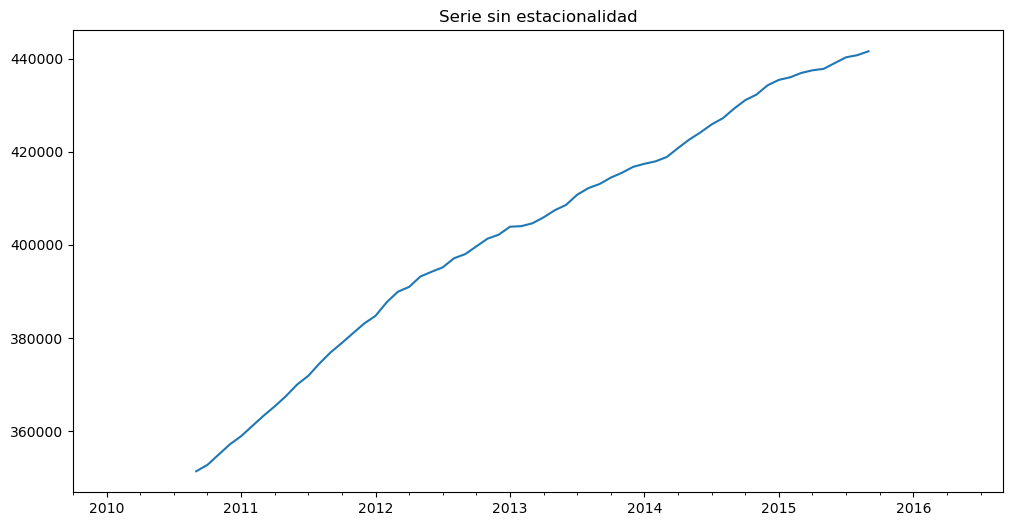

In [453]:
## Representamos el resultado
df_sales["sales_mm"].plot(figsize=(12,6), title="Serie sin estacionalidad");

#### b) Eliminamos la tendencia utilizando .diff()

El método `.diff()` se utiliza para calcular la diferencia entre observaciones consecutivas en una serie temporal. Cuando aplicamos `.diff()`, estamos calculando la tasa de cambio o la variación en los valores de la serie entre un período de tiempo y el siguiente.

La razón principal para utilizar `.diff()` para eliminar la tendencia de una serie temporal es su capacidad para diferenciar y eliminar la componente de tendencia de los datos. Cuando una serie temporal tiene una tendencia lineal, la diferencia entre observaciones consecutivas puede ayudar a eliminar esta tendencia, ya que la diferencia entre los valores sucesivos resalta los cambios relativos en lugar de los niveles absolutos.

Al aplicar `.diff()` a una serie temporal, estamos esencialmente calculando la tasa de cambio o la pendiente entre puntos adyacentes en la serie. Si la serie tiene una tendencia lineal, la diferencia entre los valores sucesivos será aproximadamente constante, lo que resultará en una serie diferenciada sin tendencia.

Es importante tener en cuenta que el método `.diff()` puede ser útil para eliminar la tendencia lineal en una serie temporal, pero puede no ser efectivo para eliminar tendencias no lineales o más complejas. En tales casos, pueden ser necesarios otros métodos más avanzados de descomposición de series temporales para eliminar la tendencia de manera adecuada.

In [454]:
## Eliminamos la tendencia
df_sales['sales_mm_st'] = df_sales["sales_mm"].diff()

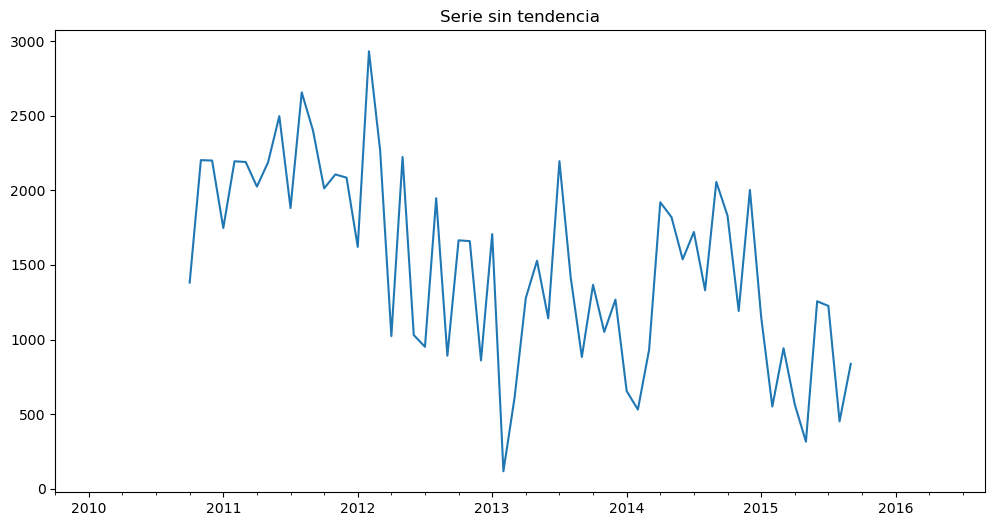

In [455]:
## Representamos el resultado
df_sales["sales_mm_st"].plot(figsize=(12,6), title="Serie sin tendencia");

### 4.2.-  Realizar la previsión

Para realizar la previsión sobre los residuos de la serie y obtener una previsión que se asemeje a los datos de las ventas anteriores, es necesario añadir tanto la tendencia como la estacionalidad a los residuos pronosticados. Esto implica volver a agregar estas componentes a los residuos pronosticados para obtener una previsión completa que capture la estructura de la serie temporal original.

Al agregar la tendencia y la estacionalidad de nuevo a los residuos pronosticados, estamos reconstruyendo la serie temporal completa a partir de los componentes descompuestos. Esto nos permite generar una previsión que refleje con precisión la estructura de la serie original, incluyendo tanto las tendencias de largo plazo como las variaciones estacionales.

Es importante tener en cuenta que al agregar la tendencia y la estacionalidad de nuevo a los residuos pronosticados, estamos asumiendo que estas componentes seguirán siendo consistentes en el período de previsión. Esto puede no ser siempre el caso, especialmente si hay cambios significativos en el comportamiento de la serie temporal que no se capturan completamente en los residuos pronosticados.

Por lo tanto, al realizar esta operación, es importante considerar cuidadosamente la estabilidad de las componentes de tendencia y estacionalidad en el período de previsión, así como cualquier cambio o anomalía que pueda afectar la precisión de la previsión final.

#### Previsión sobre la media de la componente aleatoria de la serie

In [456]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_sales['prevision_residuo'] = np.nan

In [457]:
## Representamos nuestra previsión
df_sales['prevision_residuo'][-12:] = df_sales['sales_mm_st'].mean()

In [458]:
# Añadimos el último valor de la componente aleatoria para una mejor visualización
df_sales['prevision_residuo'][-13]=df_sales['sales_mm_st'][-13]

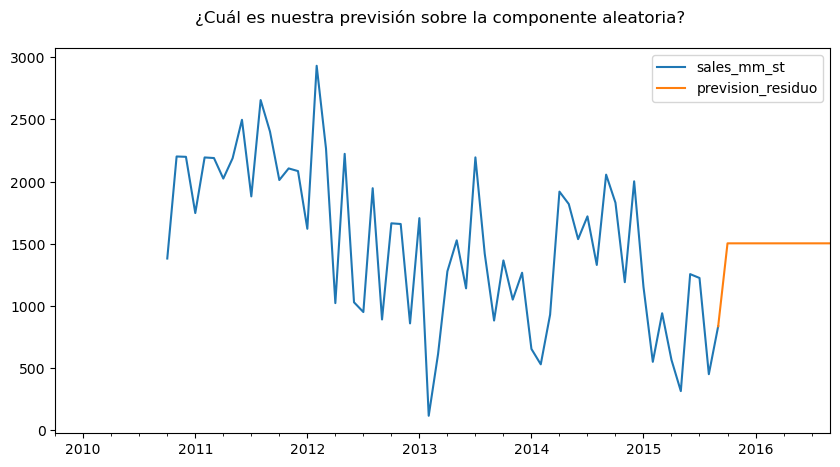

In [459]:
df_sales.loc[:,['sales_mm_st','prevision_residuo']].plot(figsize=(10,5),
                                                title='¿Cuál es nuestra previsión sobre la componente aleatoria? \n');

Una vez ya tenemos nuestra previsión sobre la componente aleatoria el siguiente paso es añadir la tendencia y la estacionalidad.

### 4.3.-  Incorporamos las componentes de la serie: estacionalidad y tendencia

### Añadimos la tendencia utilizando .cumsum()

Cuando utilizamos `cumsum()` (suma acumulativa) para añadir la tendencia a la previsión realizada sobre la componente aleatoria en una serie temporal, estamos básicamente integrando la tendencia en el tiempo. Esto se debe a que la suma acumulativa acumula los valores a lo largo del tiempo, lo que simula el efecto acumulativo de la tendencia en la serie temporal.

La tendencia representa la dirección general y persistente en la que los datos cambian o se desarrollan con el tiempo. Al sumar acumulativamente la tendencia a los valores pronosticados sobre la componente aleatoria, estamos modelando cómo se acumula la tendencia a lo largo del tiempo y cómo afecta la serie temporal en su conjunto.

Esta técnica es útil cuando queremos reconstruir una serie temporal completa a partir de sus componentes descompuestas. Al agregar la tendencia acumulativamente a los valores pronosticados sobre la componente aleatoria, estamos generando una serie temporal que refleja tanto la tendencia general como la variabilidad aleatoria de los datos.

Es importante tener en cuenta que esta técnica asume que la tendencia es lineal y que su efecto se acumula de manera uniforme a lo largo del tiempo. En situaciones donde la tendencia es no lineal o no uniforme, puede ser necesario utilizar métodos más avanzados de integración temporal para modelar con precisión su impacto en la serie temporal.

In [460]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan 
df_sales['prevision_ct']=np.nan
## Toma la variación de la serie sin estacionalidad
df_sales['prevision_ct'][-13] = df_sales['sales'][-13]
df_sales['prevision_ct'][-12:] = df_sales['prevision_ct'][-13] + df_sales['prevision_residuo'][-12:].cumsum()

El desglose del anterior código es el siguiente

1. `df_sales['prevision_ct']=np.nan`: Se crea una nueva columna en el DataFrame `df_sales` llamada 'prevision_ct' que reseprenta la previsión con la tendencia y se rellena con valores NaN (no hay datos).

2. `df_sales['prevision_ct'][-13] = df_sales['sales'][-13]`: Asigna el valor de la última observación de la serie de ventas (posición -13) a la primera posición de la columna 'prevision_ct'. Esto establece el valor inicial de la previsión como el valor de la última observación de la serie.

3. `df_sales['prevision_ct'][-12:] = df_sales['prevision_ct'][-13] + df_sales['prevision_residuo'][-12:].cumsum()`: Calcula la previsión para los siguientes 12 meses (los últimos 12 meses de la serie). Se utiliza la función `cumsum()` para sumar acumulativamente los valores de la columna 'prevision_residuo', que contiene los residuos pronosticados. Estos valores se suman al valor inicial de la previsión para generar una previsión completa para los próximos 12 meses.

En resumen, este código realiza una previsión sobre la serie temporal de ventas utilizando los residuos pronosticados y los agrega a la última observación de la serie para generar una previsión completa para los próximos 12 meses.

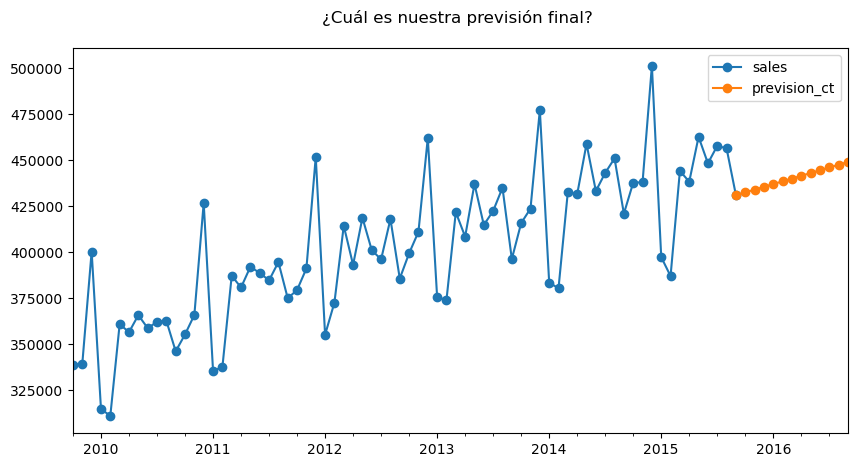

In [461]:
## Representamos nuestra previsión
df_sales.loc[:,['sales','prevision_ct']].plot(figsize=(10,5),marker='o',
                                                     title='¿Cuál es nuestra previsión final? \n');

En este punto, hemos realizado la previsión con la tendencia, pero como se puede observar en el gráfico anterior, la previsión es una línea recta que no representa la estacionalidad de la serie. Por lo tanto, el siguiente paso es añadir la estacionalidad a nuestra previsión.

Para añadir la estacionalidad a nuestra previsión, podemos utilizar varias estrategias, pero una forma común es calcular la media de las estacionalidades históricas y añadirla a nuestra previsión. Esto nos ayudará a capturar los patrones estacionales en nuestra serie temporal y a mejorar la precisión de nuestras previsiones.

Una vez que hemos añadido la estacionalidad a nuestra previsión, obtendremos una previsión completa que tiene en cuenta tanto la tendencia como la estacionalidad de la serie temporal. Esto nos proporcionará una visión más completa y precisa de cómo se espera que evolucione la serie en el futuro.

#### b) Incorporamos la estacionalidad a la previsión de alquileres.

El primer paso para incorporar la estacionalidad es calcular el coeficiente de estacionalidad. Este coeficiente representa la contribución relativa de la estacionalidad en cada período de tiempo en relación con la media de la serie temporal. 

El cálculo del coeficiente de estacionalidad nos proporciona información sobre cómo varía la serie en diferentes momentos del año en comparación con su nivel medio. Un coeficiente de estacionalidad mayor que 1 indica que la serie es más alta en ese período de tiempo en comparación con su media, mientras que un coeficiente menor que 1 indica que la serie es más baja.

Una vez calculado el coeficiente de estacionalidad, podemos utilizarlo para ajustar nuestra previsión y así incorporar la estacionalidad en el modelo. Esto nos permite tener en cuenta las fluctuaciones cíclicas y repetitivas en la serie temporal, lo que mejora la precisión de nuestras previsiones.

In [462]:
# Los coeficientes de estacionalidad se obtienen dividiendo el valor real de ventas entre la media móvil de ventas (sales_mm). 
df_sales['coef_estac'] = df_sales["sales"]/df_sales["sales_mm"]

A continuación, vamos a aplicar la estacionalidad a nuestra serie de dos formas diferentes:

1. **Desplazando los coeficientes**: Esta técnica implica desplazar los coeficientes de estacionalidad tantos períodos como sea necesario y multiplicarlos por la tendencia. Esto ajusta la serie temporal teniendo en cuenta las fluctuaciones estacionales.

2. **Calculando el coeficiente de estacionalidad medio para cada mes**: En esta técnica, calcularemos el coeficiente de estacionalidad medio para cada mes y lo multiplicaremos por la tendencia. Esto nos permite incorporar las características estacionales promedio de cada mes en nuestra serie temporal.

Ambos enfoques nos permiten ajustar la serie temporal teniendo en cuenta las variaciones estacionales, lo que nos ayuda a mejorar la precisión de nuestras previsiones. Es importante evaluar los resultados de cada enfoque para determinar cuál es más adecuado para nuestro conjunto de datos específico y el objetivo de nuestras previsiones.

#### Desplazando los coeficientes

Vamos a utilizar el método .shift() para desplazar los coeficientes de estacionalidad en 12 períodos.La razón por la que se usa dicho desplazamiento períodos es porque la serie temporal presenta estacionalidad anual, es decir, los patrones estacionales se repiten cada 12 meses. Por lo tanto, desplazar los coeficientes de estacionalidad en 12 períodos asegura que estemos aplicando los coeficientes estacionales correctos a los períodos correspondientes en la serie temporal.


In [463]:
## Aplicamos los coeficientes de estacionalidad sobre nuestra previsión con tendencia
periodos_de_desplazamiento = 12
df_sales['prevision_ct_cs'] = df_sales['prevision_ct']  \
                                     * df_sales['coef_estac'].shift(periodos_de_desplazamiento)

In [464]:
# Fijamos el primer valor de la predicción para evitar el salto de valor a la hora de graficar.
df_sales["prevision_ct_cs"].loc["2015-09-01"] = df_sales["sales"].loc["2015-09-01"]

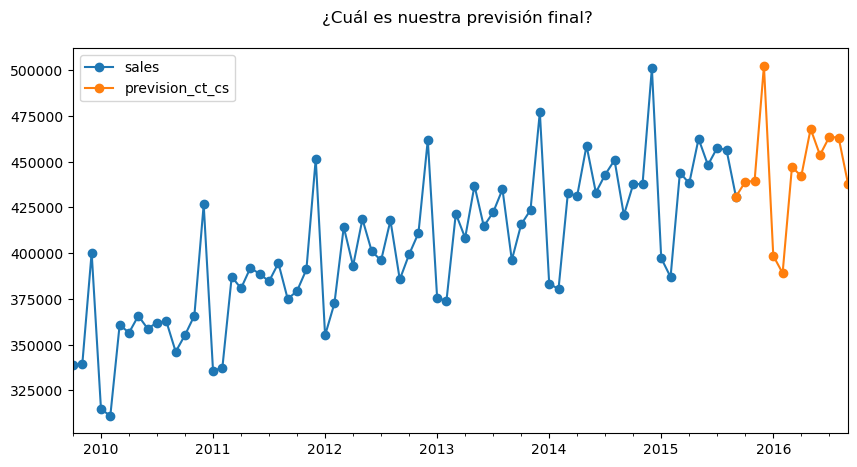

In [465]:
## Representamos nuestra previsión
df_sales.loc[:,['sales','prevision_ct_cs']].plot(figsize=(10,5),marker='o',
                                                     title='¿Cuál es nuestra previsión final? \n');

#### Calculando el coeficiente de estacionalidad medio para cada mes

Los procesos a seguir en este proceso son los siguientes:

1. Cálculo de los coeficientes de estacionalidad medios por mes:

    - Añadimos una nueva columna llamada 'Mes' al DataFrame df_sales, que contiene el número de mes correspondiente a cada índice de la serie temporal.

    - Utilizamos groupby('Mes') para agrupar los datos por mes y calcular la media de los coeficientes de estacionalidad para cada mes. Esto nos da una estimación del coeficiente de estacionalidad medio para cada mes del año.

    - Almacenamos estos coeficientes de estacionalidad medios en un diccionario llamado mapeo_mes_coeficiente, donde la clave es el número de mes y el valor es el coeficiente de estacionalidad medio correspondiente.

2. Añadir la estacionalidad a la serie temporal:

    - Usamos el método map() para asignar los coeficientes de estacionalidad medios correspondientes a cada mes en la nueva columna 'coef_estac_medio' del DataFrame df_sales.


In [466]:
# Añadimos una columna 'Mes' al DataFrame con el mes correspondiente a cada observación
df_sales['Mes'] = df_sales.index.month 
# Agrupamos nuestro DataFrame por mes, incluyendo para cada mes el coeficiente de estacionalidad medio
coeficientes_estacionalidad_medios = df_sales.groupby('Mes')['coef_estac'].mean()

In [467]:
# Creamos un diccionario de mapeo de mes a coeficiente
mapeo_mes_coeficiente = coeficientes_estacionalidad_medios.to_dict()

# Usamos map para asignar los coeficientes correspondientes a cada mes en el DataFrame
df_sales['coef_estac_medio'] = df_sales['Mes'].map(mapeo_mes_coeficiente)

In [468]:
## Aplicamos los coeficientes de estacionalidad sobre nuestra previsión con tendencia
df_sales['prevision_ct_cs_medio'] = df_sales['prevision_ct']  \
                                     * df_sales['coef_estac_medio']

In [469]:
# Se fija el primer valor de la predicción para evitar el salto de valor a la hora de graficar.
df_sales["prevision_ct_cs_medio"].loc["2015-09-01"] = df_sales["sales"].loc["2015-09-01"]

/var/folders/tk/5h7vdghn3tj4wqcq0cts54dh0000gp/T/ipykernel_92468/305885617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales["prevision_ct_cs_medio"].loc["2015-09-01"] = df_sales["sales"].loc["2015-09-01"]


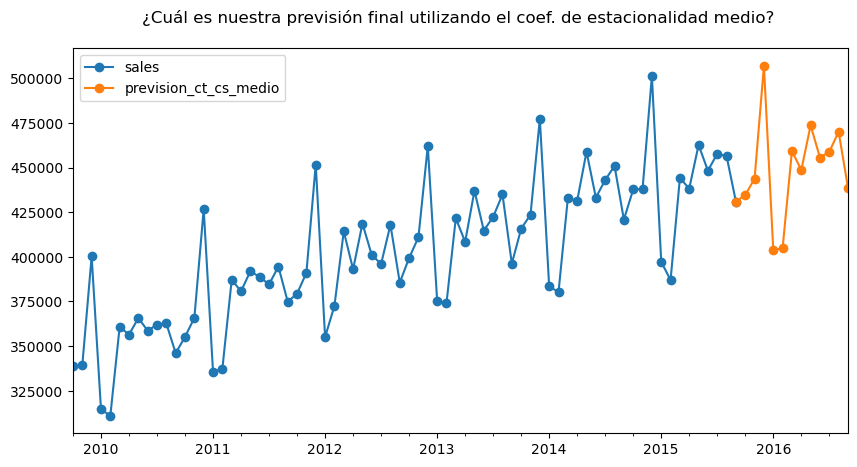

In [470]:
## Representamos nuestra previsión
df_sales.loc[:,['sales','prevision_ct_cs_medio']].plot(figsize=(10,5),marker='o',
                                                     title='¿Cuál es nuestra previsión final utilizando el coef. de estacionalidad medio? \n');

### Comparación de las previsiones

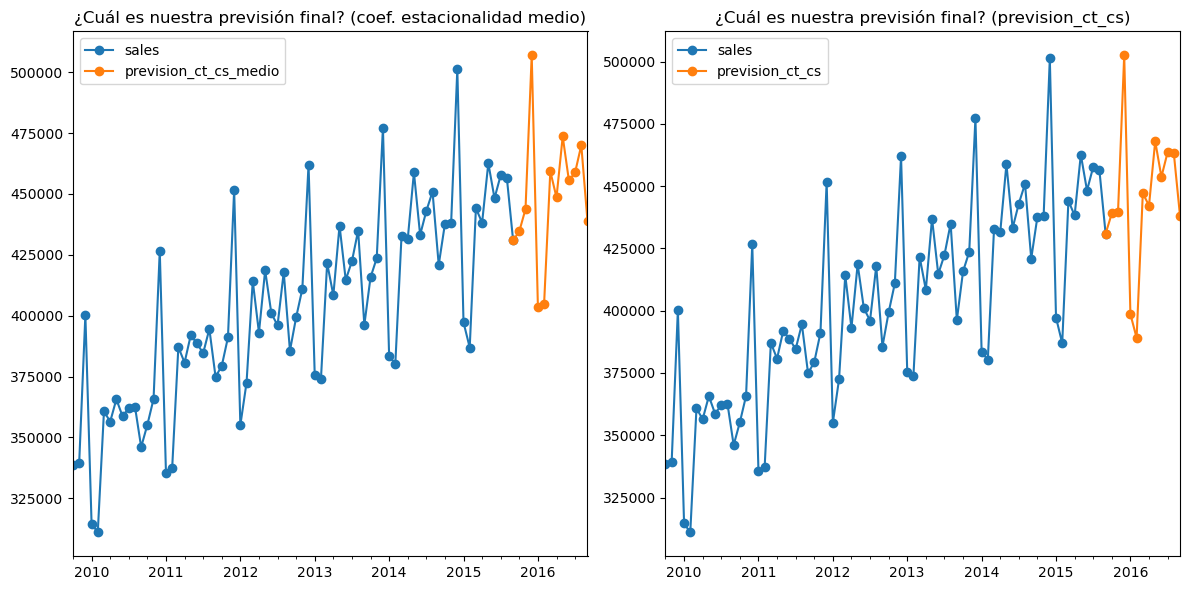

In [471]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,8))

df_sales.loc[:,['sales','prevision_ct_cs_medio']].plot(figsize=(12,6), marker='o',
                                                     title='¿Cuál es nuestra previsión final? (coef. estacionalidad medio)',
                                                     ax=ax[0])


df_sales.loc[:,['sales','prevision_ct_cs']].plot(figsize=(12,6), marker='o',
                                                     title='¿Cuál es nuestra previsión final? (prevision_ct_cs)',
                                                     ax=ax[1])

plt.tight_layout()  # Adjust layout
plt.show()


Se realiza un zoom en la representación para una mejor visualización de las previsiones.

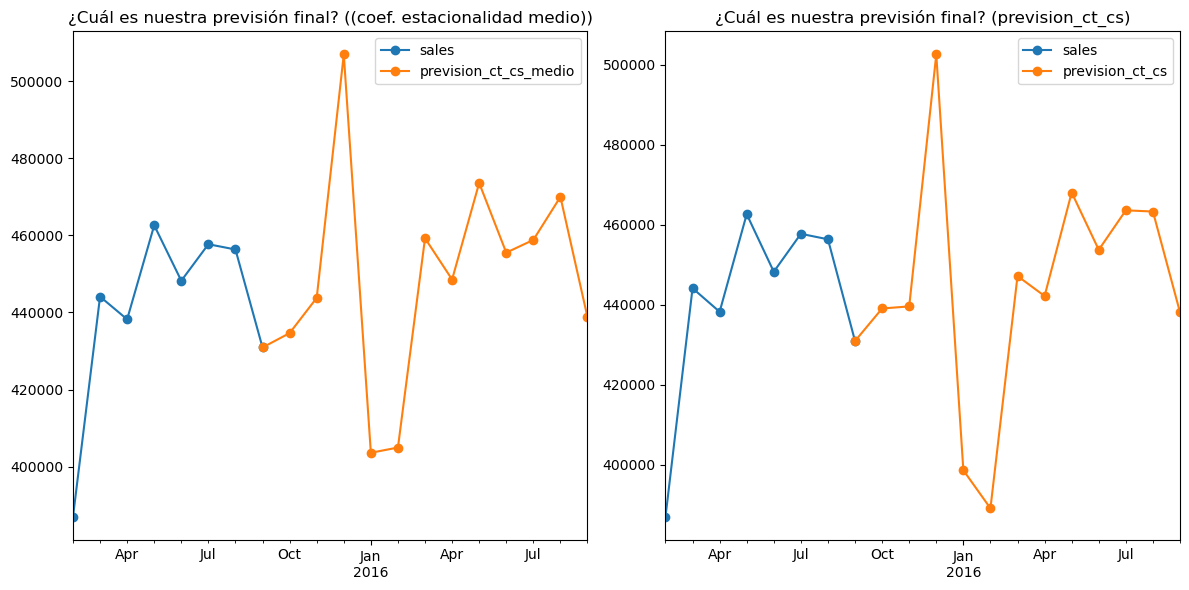

In [472]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,8))

df_sales.loc[:,['sales','prevision_ct_cs_medio']][-20:].plot(figsize=(12,6), marker='o',
                                                     title='¿Cuál es nuestra previsión final? ((coef. estacionalidad medio))',
                                                     ax=ax[0])


df_sales.loc[:,['sales','prevision_ct_cs']][-20:].plot(figsize=(12,6), marker='o',
                                                     title='¿Cuál es nuestra previsión final? (prevision_ct_cs)',
                                                     ax=ax[1])

plt.tight_layout()  # Adjust layout
plt.show()

In [473]:
# Se observan los diferentes valores de las previsiones.
df_sales[["prevision_ct_cs", "prevision_ct_cs_medio"]].tail(13)

,prevision_ct_cs,prevision_ct_cs_medio
2015-09-01,430917.000000,430917.000000
2015-10-01,439041.734115,434641.749251
2015-11-01,439563.014371,443774.035653
2015-12-01,502540.116975,506952.710506
2016-01-01,398604.794855,403591.525049
2016-02-01,389096.034161,404948.016093
2016-03-01,447156.089081,459260.524398
2016-04-01,442157.320279,448548.619012
2016-05-01,468026.727271,473609.505251
2016-06-01,453710.035921,455524.169492


## 5. Evaluación del método de cálculo del coeficiente de estacionalidad

Para evaluar que método ha sido mejor en este ejemplo vamos a dividir la serie temporal en datos de test y datos de training. En este caso los datos de test van a ser los datos desde octubre de 2014 hasta septiembre de 2015. Vamos a realizar los mismos procesos para obtener la predicción para el período 2014-10 hasta 2015-09 siguiendo la misma metodología que en la primera parte del notebook por lo que no habrá tantos comentarios a continuación. El último paso será comparar las prediciones con los valores reales que reservamos al principio.

In [474]:
## Carga de los datos
data_path = 'retail_sales.csv'
df_sales_prueba = pd.read_csv(data_path)

In [475]:
# Creamos un campo fecha y lo convertimos en el índice de nuestro DataFrame.
df_sales_prueba['date'] = pd.to_datetime(df_sales_prueba['date'], format='%Y-%m-%d') 
# La columna en formato datetime pasará a ser el índice del DataFrame.
df_sales_prueba.index = df_sales_prueba.date

In [476]:
df_sales_test = df_sales_prueba[-12:]
df_sales_train = df_sales_prueba[:-12]

In [477]:
df_sales_test = df_sales_test.sales

In [478]:
# Creamos un nuevo DataFrame que incluye las fechas a predecir y valores nulos en la columna sales.
df_fechas_prevision_prueba = pd.DataFrame({'sales':12*[np.nan]},
                             index = pd.date_range('2014-10-01', periods=12, freq='MS'))
df_fechas_prevision_prueba

,sales
2014-10-01,NaN
2014-11-01,NaN
2014-12-01,NaN
2015-01-01,NaN
2015-02-01,NaN
2015-03-01,NaN
2015-04-01,NaN
2015-05-01,NaN
2015-06-01,NaN
2015-07-01,NaN


In [479]:
df_sales_train = pd.concat([df_sales_train, df_fechas_prevision_prueba])

In [480]:
# Nos quedamos únicamente con la columna sales y las fechas en el índice, eliminando la columna date del DataFrame.
df_sales_train.drop(columns=(["date"]), inplace=True)

In [481]:
# Como la serie tiene datos mensuales, elegimos una ventana móvil de tamaño 12, que eliminará la estacionalidad mensual de la serie.
ventana_movil = 12
df_sales_train['sales_mm'] = df_sales_train['sales'].rolling(ventana_movil).mean()

In [482]:
## Eliminamos la tendencia
df_sales_train['sales_mm_st'] = df_sales_train["sales_mm"].diff()

In [483]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_sales_train['prevision_residuo'] = np.nan

In [484]:
## Representamos nuestra previsión
df_sales_train['prevision_residuo'][-12:] = df_sales_train['sales_mm_st'].mean()

In [485]:
df_sales_train.tail(20)

,sales,sales_mm,sales_mm_st,prevision_residuo
2014-02-01,380315.0,417956.750000,531.416667,NaN
2014-03-01,432806.0,418887.416667,930.666667,NaN
2014-04-01,431415.0,420806.916667,1919.500000,NaN
2014-05-01,458822.0,422626.666667,1819.750000,NaN
2014-06-01,433152.0,424164.250000,1537.583333,NaN
2014-07-01,443005.0,425884.916667,1720.666667,NaN
2014-08-01,450913.0,427215.166667,1330.250000,NaN
2014-09-01,420871.0,429271.166667,2056.000000,NaN
2014-10-01,NaN,NaN,NaN,1623.032986
2014-11-01,NaN,NaN,NaN,1623.032986


In [486]:
# Añadimos el último valor de la componente aleatoria para una mejor visualización
df_sales_train['prevision_residuo'][-13]=df_sales_train['sales_mm_st'][-13]

In [487]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan 
df_sales_train['prevision_ct']=np.nan
## Toma la variación de la serie sin estacionalidad
df_sales_train['prevision_ct'][-13] = df_sales_train['sales'][-13]
df_sales_train['prevision_ct'][-12:] = df_sales_train['prevision_ct'][-13] + df_sales_train['prevision_residuo'][-12:].cumsum()

In [488]:
# Los coeficientes de estacionalidad se obtienen dividiendo el valor real de ventas entre la media móvil de ventas (sales_mm). 
df_sales_train['coef_estac'] = df_sales_train["sales"]/df_sales_train["sales_mm"]

In [489]:
## Aplicamos los coeficientes de estacionalidad sobre nuestra previsión con tendencia
periodos_de_desplazamiento = 12
df_sales_train['prevision_ct_cs'] = df_sales_train['prevision_ct']  \
                                     * df_sales_train['coef_estac'].shift(periodos_de_desplazamiento)

In [490]:
# Fijamos el primer valor de la predicción para evitar el salto de valor a la hora de graficar.
df_sales_train["prevision_ct_cs"].loc["2014-09-01"] = df_sales_train["sales"].loc["2014-09-01"]

In [491]:
# Añadimos una columna 'Mes' al DataFrame con el mes correspondiente a cada observación
df_sales_train['Mes'] = df_sales_train.index.month 
# Agrupamos nuestro DataFrame por mes, incluyendo para cada mes el coeficiente de estacionalidad medio
coeficientes_estacionalidad_medios = df_sales_train.groupby('Mes')['coef_estac'].mean()

In [492]:
# Creamos un diccionario de mapeo de mes a coeficiente
mapeo_mes_coeficiente = coeficientes_estacionalidad_medios.to_dict()

# Usamos map para asignar los coeficientes correspondientes a cada mes en el DataFrame
df_sales_train['coef_estac_medio'] = df_sales_train['Mes'].map(mapeo_mes_coeficiente)

In [493]:
## Aplicamos los coeficientes de estacionalidad sobre nuestra previsión con tendencia
df_sales_train['prevision_ct_cs_medio'] = df_sales_train['prevision_ct']  \
                                     * df_sales_train['coef_estac_medio']

In [494]:
# Se fija el primer valor de la predicción para evitar el salto de valor a la hora de graficar.
df_sales_train["prevision_ct_cs_medio"].loc["2014-09-01"] = df_sales_train["sales"].loc["2014-09-01"]

/var/folders/tk/5h7vdghn3tj4wqcq0cts54dh0000gp/T/ipykernel_92468/997405528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_train["prevision_ct_cs_medio"].loc["2014-09-01"] = df_sales_train["sales"].loc["2014-09-01"]


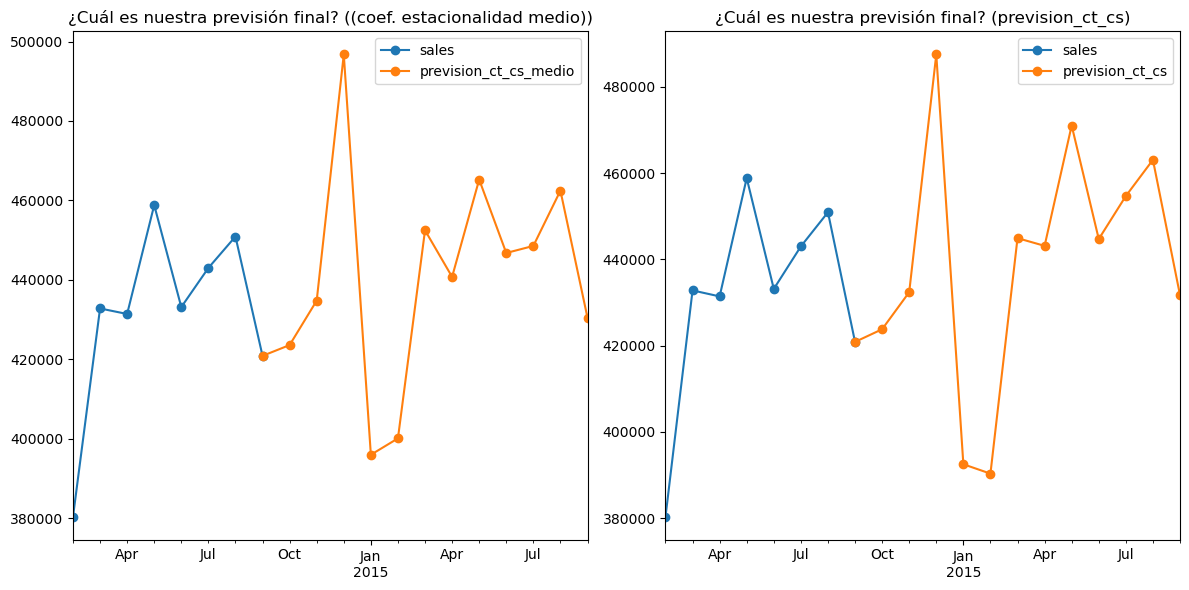

In [495]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,8))

df_sales_train.loc[:,['sales','prevision_ct_cs_medio']][-20:].plot(figsize=(12,6), marker='o',
                                                     title='¿Cuál es nuestra previsión final? ((coef. estacionalidad medio))',
                                                     ax=ax[0])


df_sales_train.loc[:,['sales','prevision_ct_cs']][-20:].plot(figsize=(12,6), marker='o',
                                                     title='¿Cuál es nuestra previsión final? (prevision_ct_cs)',
                                                     ax=ax[1])

plt.tight_layout()  # Adjust layout
plt.show()

In [496]:
# Se observan los diferentes valores de las previsiones.
df_train = df_sales_train[["prevision_ct_cs", "prevision_ct_cs_medio"]]
df_train

,prevision_ct_cs,prevision_ct_cs_medio
2009-10-01,NaN,NaN
2009-11-01,NaN,NaN
2009-12-01,NaN,NaN
2010-01-01,NaN,NaN
2010-02-01,NaN,NaN
...,...,...
2015-05-01,471012.256415,465254.494073
2015-06-01,444705.783781,446771.516359
2015-07-01,454672.300092,448547.694573
2015-08-01,463060.616897,462466.805469


Hasta este punto la metodología es idéntica a los procesos seguidos durante todo el notebook.

### Comparación entre métodos

En primer lugar, debemos juntar los datos de train y de test en un único DataFrame, utilizando pd.merge().
El método merge de Pandas se utiliza para combinar dos DataFrames en base a una o varias columnas comunes, o en este caso, en base a los índices de los DataFrames. 

In [497]:
df_comparacion = pd.merge(df_train,df_sales_test, left_index=True, right_index=True)

In [498]:
df_comparacion

,prevision_ct_cs,prevision_ct_cs_medio,sales
2014-10-01,423808.047932,423589.190541,437702
2014-11-01,432393.591857,434772.718346,437910
2014-12-01,487475.640467,496751.375035,501232
2015-01-01,392526.721165,395971.784952,397252
2015-02-01,390351.090910,400097.252153,386935
2015-03-01,444917.266784,452481.687018,444110
2015-04-01,443128.333945,440753.030459,438217
2015-05-01,471012.256415,465254.494073,462615
2015-06-01,444705.783781,446771.516359,448229
2015-07-01,454672.300092,448547.694573,457710


Para iniciar la comparación, el primer paso es visualizar tanto las predicciones como los datos reales. Esto nos permitirá tener una percepción visual de la proximidad entre nuestras predicciones y la serie temporal real.

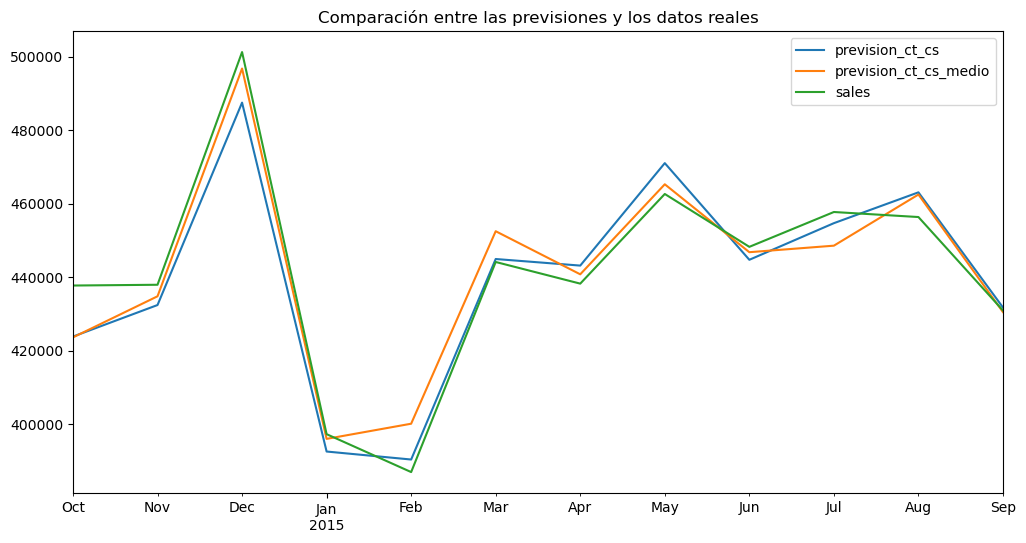

In [499]:
df_comparacion.plot(figsize=(12,6), title= "Comparación entre las previsiones y los datos reales");

Después de realizar la visualización, el siguiente paso es evaluar el error medio de cada una de las predicciones en relación con la serie real. Esto nos proporcionará una medida cuantitativa de la precisión de nuestras predicciones.

In [500]:
df_comparacion["error_prevision"] = abs(df_comparacion.sales - df_comparacion["prevision_ct_cs"])
df_comparacion["error_prevision_coef_medio"] = abs(df_comparacion.sales - df_comparacion["prevision_ct_cs_medio"])

In [501]:
print(f"El error medio para la previsión normal es {df_comparacion['error_prevision'].mean()}")
print(f"El error medio para la previsión utilizando el coeficiente medio es {df_comparacion['error_prevision_coef_medio'].mean()}")

El error medio para la previsión normal es 5793.24702570566
El error medio para la previsión utilizando el coeficiente medio es 5575.8433759009395


La predicción basada en el coeficiente medio de estacionalidad para cada mes exhibe un error medio menor en comparación con la predicción utilizando los coeficientes desplazados. Esta conclusión se justifica por varias razones:

1. **Coherencia con la tendencia estacional**: Al calcular el coeficiente medio de estacionalidad para cada mes, estamos capturando la tendencia estacional promedio de los datos históricos. Esto significa que nuestra predicción tendrá en cuenta de manera más efectiva las fluctuaciones estacionales regulares en los datos, lo que puede resultar en una mejor capacidad para predecir los valores futuros.

2. **Reducción de la sensibilidad a los cambios abruptos**: Los coeficientes desplazados pueden ser más sensibles a cambios abruptos o anómalos en los datos históricos, ya que se basan en valores específicos en el pasado. Por otro lado, el coeficiente medio de estacionalidad suaviza estas variaciones al promediar los valores a lo largo del tiempo, lo que puede conducir a predicciones más estables y consistentes.

En resumen, la predicción basada en el coeficiente medio de estacionalidad para cada mes generalmente presenta un error medio menor debido a su capacidad para capturar la tendencia estacional de manera más efectiva, su menor sensibilidad a cambios abruptos y su menor propensión al sobreajuste.